<a href="https://colab.research.google.com/github/xuhu357/fordream/blob/master/OCR_TEST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Apply OCR

### 필요한 도구 설치

In [1]:
# tesseract-ocr 설치하기
!apt-get install tesseract-ocr
!apt-get install tesseract-ocr-kor

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr-kor is already the newest version (4.00~git24-0e00fe6-1.2).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.


In [2]:
!pip install pytesseract

### 테스트할 파일 업로드하기

* image 파일: example_01.png, example_02.png, example_03.png, test1.png

In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [4]:
!ls

example_01.png	example_03.png	image_out.jpg  test1.png
example_02.png	gray_out.jpg	sample_data


In [0]:
from PIL import Image
import pytesseract
import argparse
import cv2
import os
from PIL import Image as PIL_Image

def ocr_test(image_name, preprocess="thresh", language='eng'):
  args = {}
  args["image"] = image_name
  args["preprocess"] = preprocess

  image = cv2.imread(args["image"])
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # check to see if we should apply thresholding to preprocess the image
  if args["preprocess"] == "thresh":
    gray = cv2.threshold(gray, 0, 255,
      cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

  #make a check to see if median blurring should be done to remove
  # noise
  elif args["preprocess"] == "blur":
    gray = cv2.medianBlur(gray, 3)

  filename = "{}.png".format(os.getpid())
  cv2.imwrite(filename, gray)

  # load the image as a PIL/Pillow image, apply OCR, and then delete
  # the temporary file
  text = pytesseract.image_to_string(Image.open(filename), lang=language)
  os.remove(filename)
  print(text)
  return image, gray


In [6]:
image, gray = ocr_test('example_02.png', preprocess='blur')

Tesseract Will
Fail With Noisy
Backgrounds


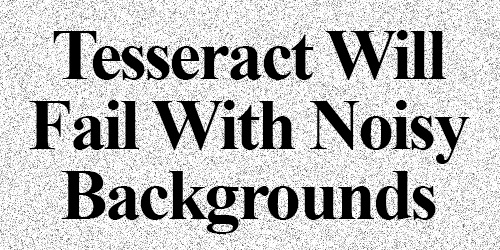

In [7]:
cv2.imwrite('image_out.jpg',image)
img_out = PIL_Image.open('image_out.jpg')
img_out

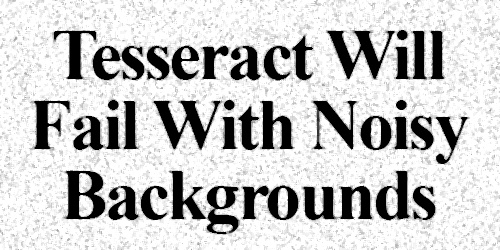

In [8]:
# gray 출력해보기
cv2.imwrite('gray_out.jpg', gray)
gray_out = PIL_Image.open('gray_out.jpg')
gray_out

PREREQUISITES

In order to make the most of this, you will need to have
alittle bit of programming experience. All examples in this
book are in the Python programming language. Familiarity
with Python or other scripting languages is suggested, but
not required.

You'll also need to know some basic mathematics. This
book is hands-on and example driven: lots of examples and
lots of code, so even if your math skills are not up to par,
do not worry! The examples are very detailed and heavily
documented to help you follow along.


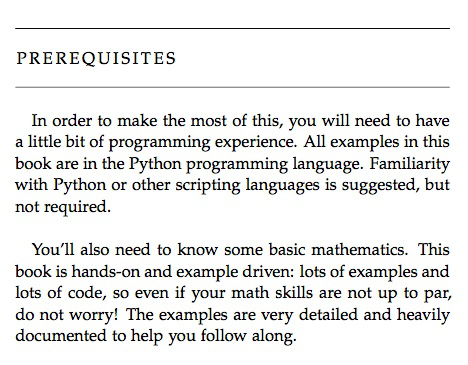

In [9]:
image, gray = ocr_test('example_03.png')

# 원본 이미지 출력해보기
cv2.imwrite('image_out.jpg',image)
img_out = PIL_Image.open('image_out.jpg')
img_out

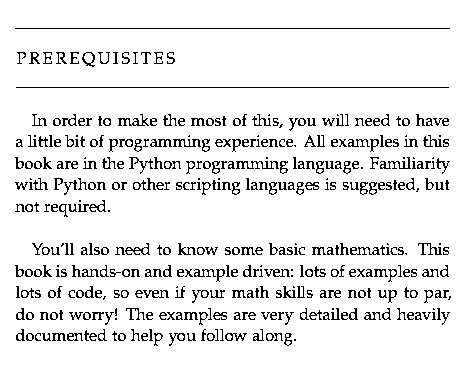

In [10]:
cv2.imwrite('gray_out.jpg', gray)
gray_out = PIL_Image.open('gray_out.jpg')
gray_out

076923

ecHs


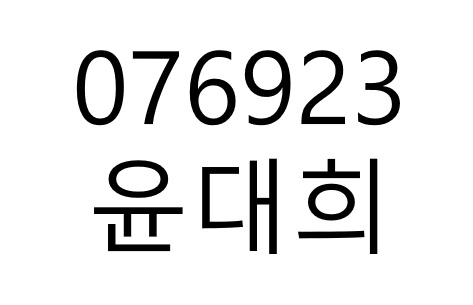

In [11]:
image, gray = ocr_test('test1.png', preprocess='blur', language='eng')


# 원본 이미지 출력해보기
cv2.imwrite('image_out.jpg',image)
img_out = PIL_Image.open('image_out.jpg')
img_out

숫자는 제대로 잘 인식, 근데 문자는 한글이어서 잘 인식 못함.

0/6923

윤대희


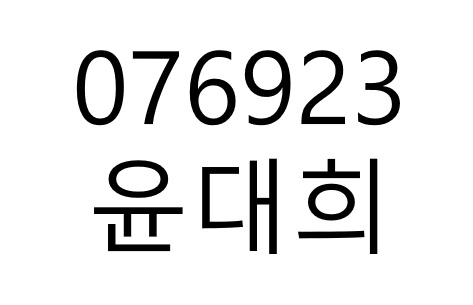

In [12]:
image, gray = ocr_test('test1.png', preprocess='blur', language='kor')


# 원본 이미지 출력해보기
cv2.imwrite('image_out.jpg',image)
img_out = PIL_Image.open('image_out.jpg')
img_out

lang을 kor로 하니 문자는 잘 인식하는데 숫자는 에러 발생. 

076923

윤 대 희


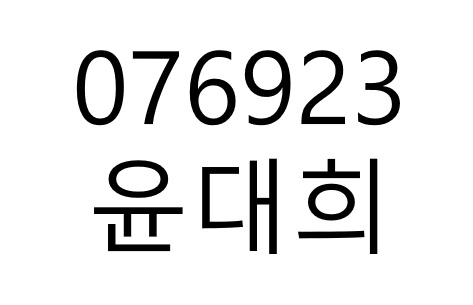

In [13]:
image, gray = ocr_test('test1.png', preprocess='blur', language='eng+kor')


# 원본 이미지 출력해보기
cv2.imwrite('image_out.jpg',image)
img_out = PIL_Image.open('image_out.jpg')
img_out

오~ 영어+한글 하니깐, 숫자, 문자 다 잘 됨~ 굿굿